In [1]:
from autumn.tools.project import get_project
from autumn.settings import Region
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
from autumn.tools.calibration.targets import get_target_series
import pandas as pd
from autumn.tools.utils.pretty import pretty_print

In [2]:
project = get_project("covid_19", "myanmar")

In [3]:
params_baseline = project.param_set.baseline
# pretty_print(params_baseline)

In [4]:
model = project.run_baseline_model(params_baseline)

In [5]:
derived_df = model.get_derived_outputs_df()

In [6]:
def plot_derived_outputs(requested_outputs):

    # Preparing
    fig = pyplot.figure(figsize=(14, 8))
    for i_out, output in enumerate(requested_outputs):

        # Plotting
        axis = fig.add_subplot(2, 2, i_out + 1)
        axis.plot(derived_df[output])

        try:
            target_dates, target_values = get_target_series(project.calibration.targets, REF_DATE, output)
            axis.scatter(target_dates, target_values, c="k")
        except:
            print(f"targets not available for {output}")

        # Finishing up
        axis.set_title(output)
        axis.set_ylim(bottom=0.)
        if "prop_" in output:
            axis.set_ylim(top=1.)
        pyplot.setp(axis.get_xticklabels(), rotation=45)
    fig.tight_layout()

# Main indicators

targets not available for infection_deaths
targets not available for hospital_admissions
targets not available for icu_admissions


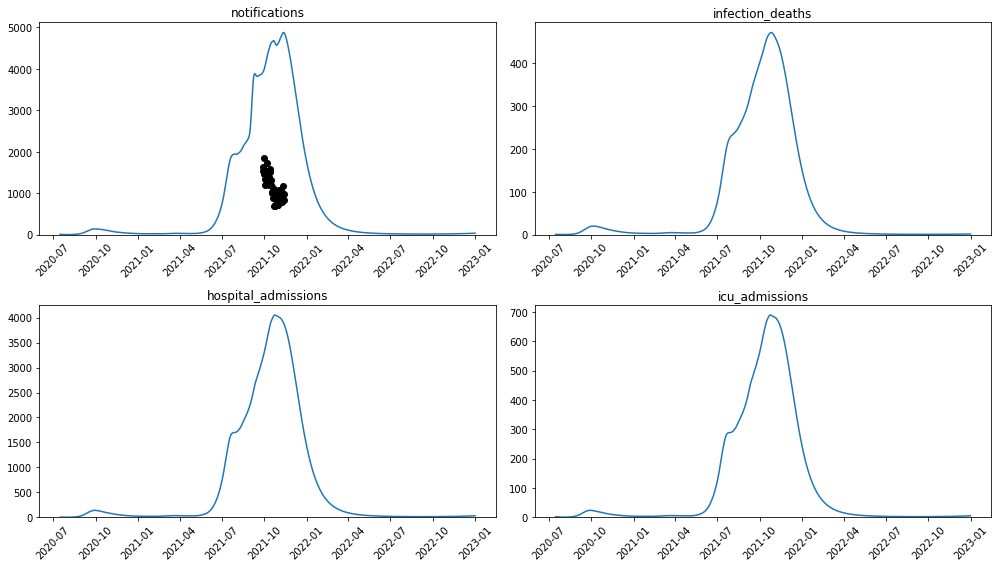

In [7]:
plot_derived_outputs(("notifications", "infection_deaths", "hospital_admissions", "icu_admissions"))

# Vaccination coverage
Note this is all ages, whereas implementation is based on 15+ years only

In [8]:
[col for col in derived_df.columns if "proportion_" in col]

['proportion_seropositiveXagegroup_75',
 'proportion_seropositiveXagegroup_70',
 'proportion_seropositiveXagegroup_65',
 'proportion_seropositiveXagegroup_60',
 'proportion_seropositiveXagegroup_55',
 'proportion_seropositiveXagegroup_50',
 'proportion_seropositiveXagegroup_45',
 'proportion_seropositiveXagegroup_40',
 'proportion_seropositiveXagegroup_35',
 'proportion_seropositiveXagegroup_30',
 'proportion_seropositiveXagegroup_25',
 'proportion_seropositiveXagegroup_20',
 'proportion_seropositiveXagegroup_15',
 'proportion_seropositiveXagegroup_10',
 'proportion_seropositiveXagegroup_5',
 'proportion_seropositiveXagegroup_0',
 'proportion_seropositive',
 'proportion_waned',
 'proportion_part_waned',
 'proportion_fully_vaccinated',
 'proportion_one_dose',
 'proportion_unvaccinated']

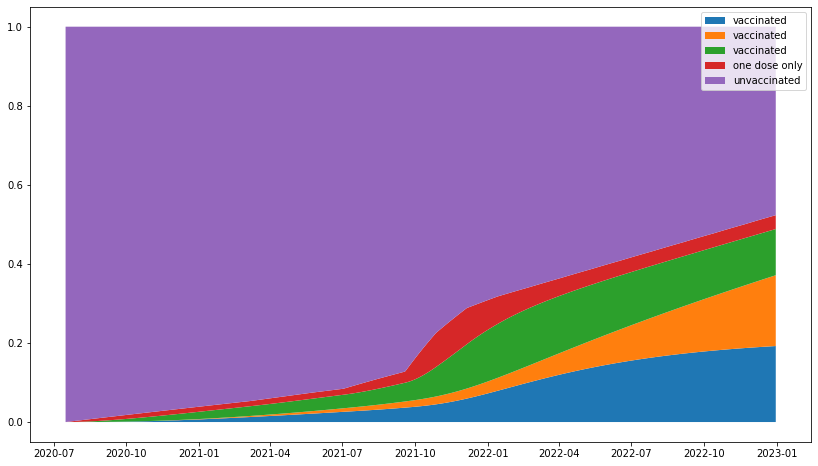

In [18]:
fig = pyplot.figure(figsize=(14, 8))
axis = fig.add_subplot(1, 1, 1)

at_least_one_dose = derived_df["at_least_one_dose_prop"]

axis.fill_between(
    derived_df.index,
    [0.] * len(derived_df),
    derived_df["proportion_waned"],
    label="vaccinated"
)
axis.fill_between(
    derived_df.index,
    derived_df["proportion_waned"],
    derived_df["proportion_part_waned"] + derived_df["proportion_waned"],
    label="vaccinated"
)
axis.fill_between(
    derived_df.index,
    derived_df["proportion_waned"] + derived_df["proportion_part_waned"],
    derived_df["proportion_fully_vaccinated"] +derived_df["proportion_waned"] + derived_df["proportion_part_waned"],
    label="vaccinated"
)
axis.fill_between(
    derived_df.index,
    derived_df["proportion_fully_vaccinated"] + derived_df["proportion_waned"] + derived_df["proportion_part_waned"],
    derived_df["proportion_one_dose"] + derived_df["proportion_fully_vaccinated"] +derived_df["proportion_waned"] + derived_df["proportion_part_waned"],
    label="one dose only"
)
axis.fill_between(
    derived_df.index,
    derived_df["proportion_one_dose"] + derived_df["proportion_fully_vaccinated"] + derived_df["proportion_waned"] + derived_df["proportion_part_waned"],
    [1.] * len(derived_df),
    label="unvaccinated"
)
axis.legend()

targets not available for proportion_seropositive


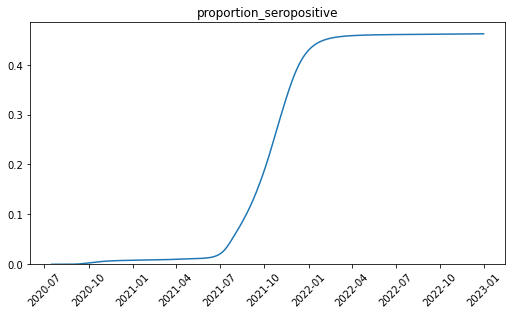

In [10]:
plot_derived_outputs(("proportion_seropositive",))

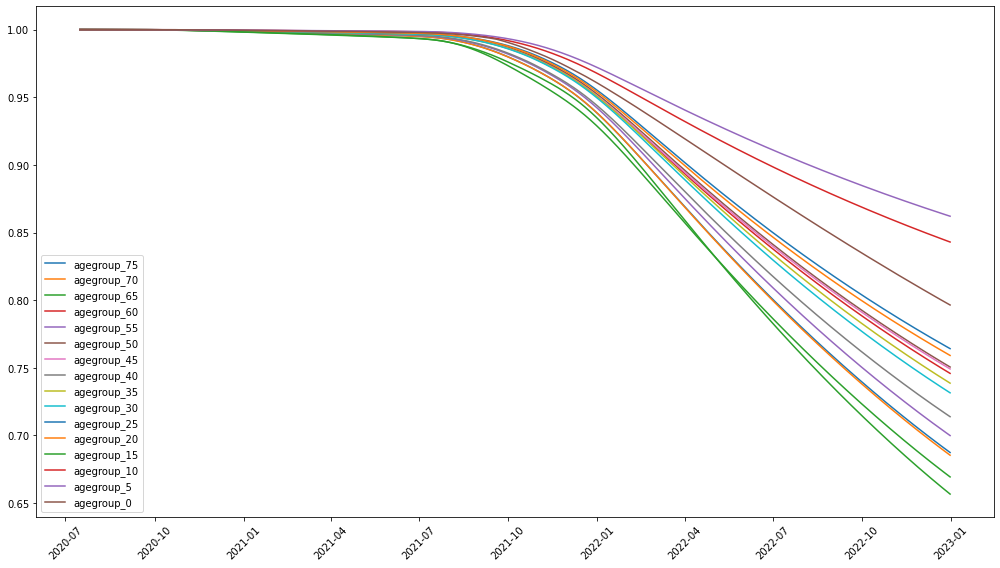

In [11]:
# Preparing
fig = pyplot.figure(figsize=(14, 8))
axis = fig.add_subplot(1, 1, 1)
requested_outputs = [col for col in derived_df.columns if "proportion_seropositiveX" in col]
for i_out, output in enumerate(requested_outputs):

    # Plotting
    axis.plot(derived_df[output], label=output.split("X")[1])

    # Finishing up
    pyplot.setp(axis.get_xticklabels(), rotation=45)

axis.legend()
fig.tight_layout()